# Kelompok 1 (Kelas 3A)

1. Salsa Ilhammita (11210940000018)
2. Reysia Amanda Yura (11210940000008)
3. Azka Azzahra Khairiyah (11210940000012)
4. Heny Rosyidatun Nafilah (11210940000016)
5. Siti Nurcholisah Dwi Rizky (11210940000009)
6. Becky Karlina Sindy (11210940000013)

In [118]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import missingno

In [ ]:
# Loading Data:

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

In [ ]:
dfJ

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
dfJ['garasi'] = dfJ['garasi'].astype('category')
dfJ['carport'] = dfJ['carport'].astype('category')
dfJ['lokasi'] = dfJ['lokasi'].astype('category')
dfJ['sertifikat'] = dfJ['sertifikat'].astype('category')
dfJ['hadap'] = dfJ['hadap'].astype('category')
dfJ.dtypes

In [ ]:
dfD

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
dfD['garasi'] = dfD['garasi'].astype('category')
dfD['carport'] = dfD['carport'].astype('category')
dfD['lokasi'] = dfD['lokasi'].astype('category')
dfD['sertifikat'] = dfD['sertifikat'].astype('category')
dfD['hadap'] = dfD['hadap'].astype('category')
dfD.dtypes

In [ ]:
dfT

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
dfT['garasi'] = dfT['garasi'].astype('category')
dfT['carport'] = dfT['carport'].astype('category')
dfT['lokasi'] = dfT['lokasi'].astype('category')
dfT['sertifikat'] = dfT['sertifikat'].astype('category')
dfT['hadap'] = dfT['hadap'].astype('category')
dfT.dtypes

# **A. Gabungkan Data dfJ dan dfD**

In [ ]:
JD = pd.concat([dfJ, dfD])
JD

In [ ]:
JT = pd.concat([JD, dfT])
JT

# **Preprocessing**

#1. Missing Value

In [ ]:
JT.isnull().sum()

In [ ]:
#Menampilkan Persebaran Missing Value pada Data di PT RPPI
missingno.matrix(JD, figsize= (16, 5), fontsize=12 )

**Interpretasi**

Pada visualisasi di atas, data pada garasi dan hadap lebih dominan NaN di bandingkan data lainnya, terdapat pula missing value di unnamed 14-15. Oleh karena itu, kita akan menggunakan  drop untuk menghilangkan kolom unnamed 14-25

In [ ]:
MV = JT.dropna(axis=1, how='all')
MV

In [ ]:
JT.info()

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
JT['garasi'] = JT['garasi'].astype('category')
JT['carport'] = JT['carport'].astype('category')
JT['lokasi'] = JT['lokasi'].astype('category')
JT['sertifikat'] = JT['sertifikat'].astype('category')
JT['hadap'] = JT['hadap'].astype('category')
JT.dtypes

In [ ]:
mean = MV["harga"].mean()
MV["harga"] = MV["harga"].replace(np.nan, mean)
MV

#2. Duplicated Data

Mengecek data duplikat 

In [ ]:
print(MV.shape)
MV.duplicated().sum() #melihat jumlah duplicated data pada JD (Data Gabungan Jakarta Depok)

Karena adanya duplikat data pada Data JD maka dilakukan drop data untuk menghilangkan data yang duplikat

In [ ]:
#menghapus entri yang memiliki data duplikat 
MV.drop_duplicates(inplace=True)
print(MV.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MV.shape) # re-check by printing data size

#3. Outlier

In [ ]:
#outlier pada kolom wind_speed
# Deteksi Outlier menggunakan nilai IQR

Q1 = MV.harga.quantile(0.25)
Q3 = MV.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

In [ ]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

In [ ]:
#Mengecek outlier menggunakan visualisasi boxplot
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = MV.harga).set_title('Harga Boxplot')

In [ ]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = MV.harga.quantile(0.25)
Q3 = MV.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

In [ ]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

In [ ]:
# handle outlier dengan replace menggantinya dengan nilai mean

MV['harga'] = MV.harga.mask(MV.harga > batasAtas, MV.harga.mean())
MV['harga'] = MV.harga.mask(MV.harga < batasBawah, MV.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MV.harga).set_title('Harga Boxplot')

#4. Statistika Deskriptif

In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
MV.describe(include='all')

# **B. Gabungkan Data dfJ dan dfT**

In [ ]:
JT = pd.concat([dfJ, dfT])
JT

#1. Missing Value

In [ ]:
JT.isnull().sum()

Karena pada Unnamed14-25 terdapat lebih dari 50% Missing Value maka kita hilangkan kolom Unnamed14-25 tersebut menggunakan drop


In [ ]:
MK = JT.dropna(axis=1, how='all')
MK

#2. Duplicate Data

In [ ]:
print(MK.shape)
MK.duplicated().sum() #melihat jumlah duplicated data pada Data JT (Gabungan data Jakarta Tangerang)

In [ ]:
#menghapus entri yang memiliki data duplikat 
MK.drop_duplicates(inplace=True)
print(MK.duplicated().sum()) # menghitung jumlah data yang duplikat
print(MK.shape) # re-check by printing data size

#3. Outlier

a. Outlier pada kolom harga

Text(0.5, 1.0, 'Harga')

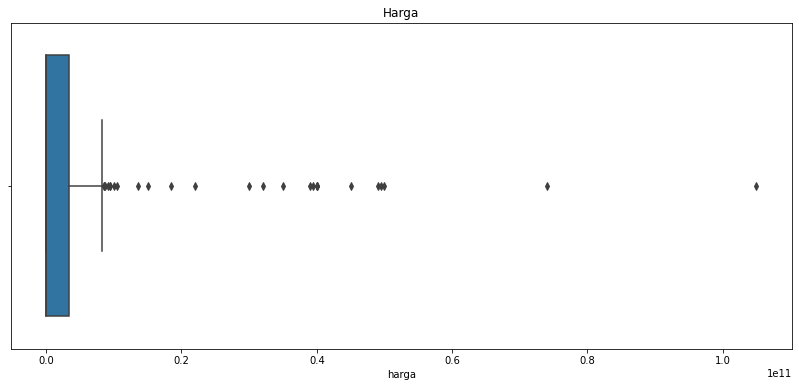

In [130]:
fig, ax = plt.subplots(figsize = (14,6))
sns.boxplot(x = MK.harga).set_title('Harga')

In [129]:
# Deteksi Outlier menggunakan nilai IQR

Q1 = MK.harga.quantile(0.25)
Q3 = MK.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 1950.0
Q2 = 3400000000.0
IQR = 3399998050.0


In [128]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -5099995125.0
batas atas = 8499997075.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


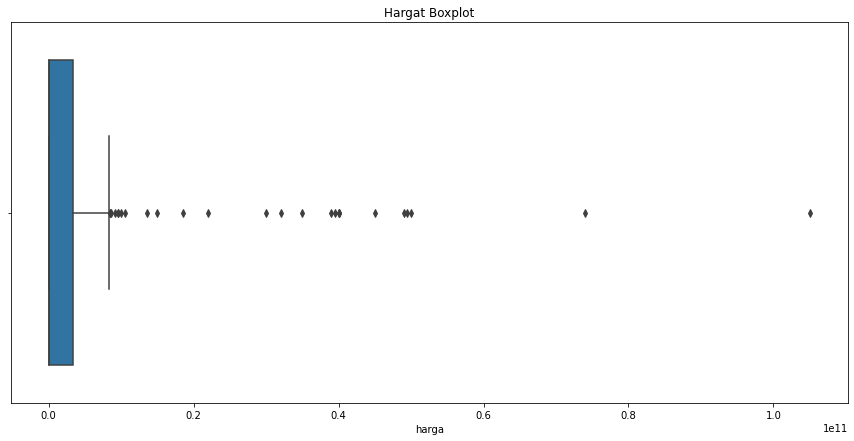

In [127]:
# handle outlier dengan replace menggantinya dengan nilai mean

MK['Harga'] = MK.harga.mask(MK.harga > batasAtas, MK.harga.mean())
MK['Harga'] = MK.harga.mask(MK.harga < batasBawah, MK.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = MK.harga).set_title('Hargat Boxplot')

#4. Statistika Deskriptif

In [126]:

MK.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga,Harga
count,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,231.000000,2.450000e+02,2.450000e+02
mean,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,4722.077922,4.437963e+09,4.437963e+09
std,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,7389.109908,1.200940e+10,1.200940e+10
min,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,900.000000,9.500000e+01,9.500000e+01
25%,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.950000e+03,1.950000e+03
50%,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,2200.000000,1.550000e+04,1.550000e+04
75%,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,4400.000000,3.400000e+09,3.400000e+09
max,3422.000000,2500.000000,10.000000,10.000000,10.000000,10.000000,66000.000000,1.050000e+11,1.050000e+11


In [125]:
# Statistika Sederhana dari data "Numerik"-nya
MK.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi,Harga
count,245,245.000000,245.000000,245.000000,245.000000,82.000000,182.000000,245,241,231.000000,85,2.450000e+02,245,236,2.450000e+02
unique,22,NaN,NaN,NaN,NaN,NaN,NaN,46,9,NaN,12,NaN,244,223,NaN
top,12-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,Utara,NaN,https://www.rumah.com/listing-properti/dijual-...,Dekat dengan berbagai fasilitas seperti :\r\nS...,NaN
freq,102,NaN,NaN,NaN,NaN,NaN,NaN,27,186,NaN,28,NaN,2,8,NaN
mean,NaN,224.844898,239.004082,3.804082,3.032653,2.024390,1.780220,NaN,NaN,4722.077922,NaN,4.437963e+09,NaN,NaN,4.437963e+09
std,NaN,329.023469,277.110345,1.612701,1.549377,1.684905,1.360876,NaN,NaN,7389.109908,NaN,1.200940e+10,NaN,NaN,1.200940e+10
min,NaN,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,9.500000e+01,NaN,NaN,9.500000e+01
25%,NaN,90.000000,88.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.950000e+03,NaN,NaN,1.950000e+03
50%,NaN,144.000000,154.000000,3.000000,3.000000,1.500000,1.000000,NaN,NaN,2200.000000,NaN,1.550000e+04,NaN,NaN,1.550000e+04
75%,NaN,250.000000,300.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,4400.000000,NaN,3.400000e+09,NaN,NaN,3.400000e+09


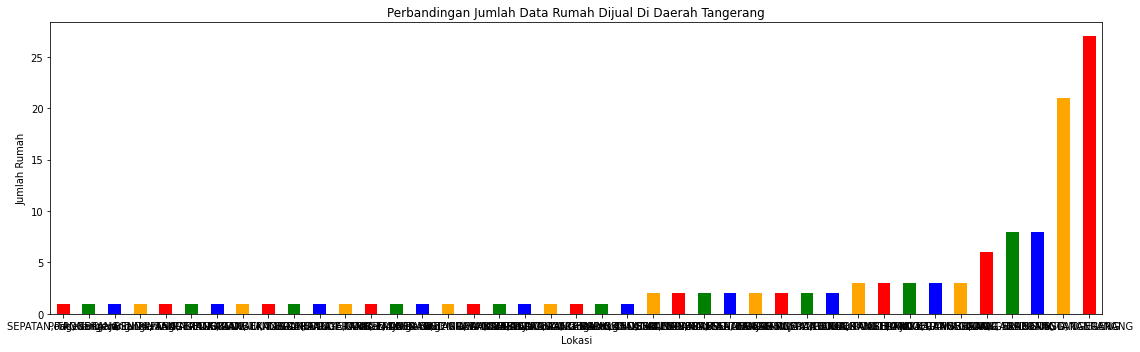

BSD, TANGERANG                      27
BSD CITY, TANGERANG                 21
GADING SERPONG, TANGERANG            8
CISAUK, TANGERANG                    8
BSD THE ICON, TANGERANG              6
CILEDUG, TANGERANG                   3
PONDOK CABE, TANGERANG               3
LIPPO KARAWACI, TANGERANG            3
CIPONDOH, TANGERANG                  3
CIKUPA CITRA JAYA, TANGERANG         3
BSD PUSPITA LOKA, TANGERANG          2
BANJAR WIJAYA, TANGERANG             2
BSD THE GREEN, TANGERANG             2
ALAM SUTERA, TANGERANG               2
BSD FORESTA, TANGERANG               2
BSD EMINENT, TANGERANG               2
BSD DELATINOS, TANGERANG             2
BSD NUSALOKA, TANGERANG              2
BSD PROVANCE PARKLAND, TANGERANG     1
MAUK, TANGERANG                      1
SEPATAN, TANGERANG                   1
RAWAKALONG, TANGERANG                1
Poris, Tangerang                     1
Pagedangan, Tangerang                1
PONDOK JAGUNG, TANGERANG             1
BENDA, TANGERANG         

In [124]:
#Menampilkan grafik Perbandingan Jumlah data Rumah di Tangerang
plt.figure(figsize=(16,5))
tmp_dT1 = dfT.lokasi.value_counts()
tmp_dT1.sort_values().plot(kind="bar", color=['r','g','b','orange'])
plt.title(f"Perbandingan Jumlah Data Rumah Dijual Di Daerah Tangerang")
plt.xlabel("Lokasi")
plt.ylabel(f"Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
display(tmp_dT1)

Kawasan BSD memiliki jumlah data rumah yang dijual lebih banyak di bandingkan kawasan lain di Tangerang, karena BSD merupakan kawasan titik pusat industri perkantoran, perdagangan, pendidikan, wisata, hingga perumahan. 

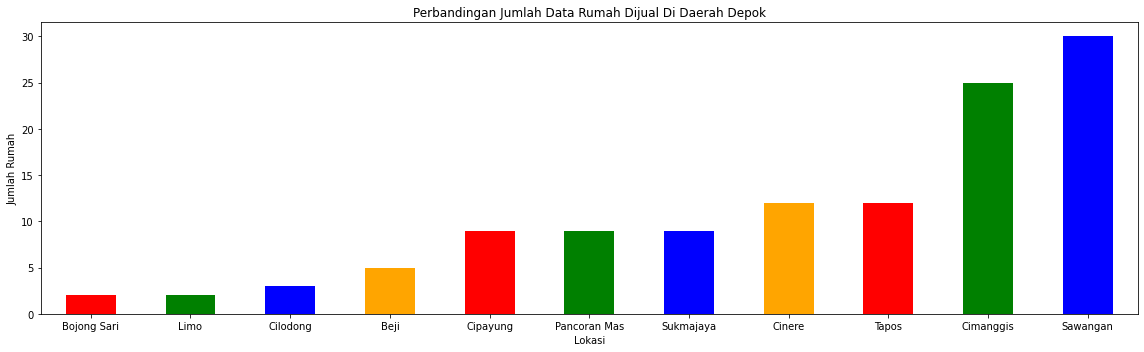

Sawangan        30
Cimanggis       25
Cinere          12
Tapos           12
Cipayung         9
Pancoran Mas     9
Sukmajaya        9
Beji             5
Cilodong         3
Bojong Sari      2
Limo             2
Name: lokasi, dtype: int64

In [123]:
#Menampilkan grafik Perbandingan Jumlah data Rumah di Depok
plt.figure(figsize=(16,5))
tmp_dD1 = dfD.lokasi.value_counts()
tmp_dD1.sort_values().plot(kind="bar", color=['r','g','b','orange'])
plt.title(f"Perbandingan Jumlah Data Rumah Dijual Di Daerah Depok")
plt.xlabel("Lokasi")
plt.ylabel(f"Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
display(tmp_dD1)

Karena Sawangan merupakan kawasan yang strategis dan sangat mudah dijangkau dari kawasan lainnya seperti Jakarta, Bogor, dan BSD, serta memiliki kondisi alam yang lebih asri. Umumnya rumah yang dijual merupkan perumahan yang baru dan dengan mengutamakan kualitas serta berada di lingkungan asri. Akan tetapi, dijual dengan banderol terjangkau.

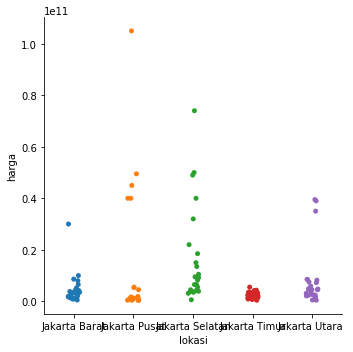

In [122]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah Jakarta
j = sns.catplot(x="lokasi", y="harga", data=dfJ)

Rata-rata kawasan Jakarta Timur memiliki harga yang lebih rendah di bandingkan daerah kawasan lainnya. Maka dari itu kami sarankan untuk membeli rumah di kawasan Jakarta Timur berdasarkan harga yang terendah. 

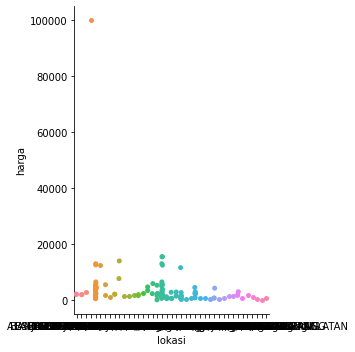

In [121]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah Tangerang
t = sns.catplot(x="lokasi", y="harga", data=dfT)

Harga rumah dikawasan Tangerang terbilang cukup rendah karena kawasan tersebut masih dalam tahap pembangunan perumahan.

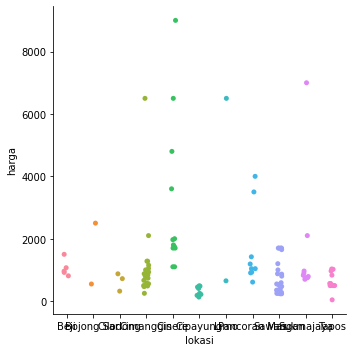

In [120]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah Depok
d = sns.catplot(x="lokasi", y="harga", data=dfD)

harga rumah di depok lebih bervariasi di bandingkan daerah jakarta ataupun tangerang. 

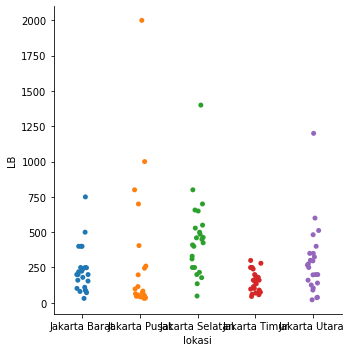

In [119]:
# Distribusi Luas Bangunan Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="LB", data=dfJ)

Karena Jakarta Timur merupakan kawasan yang memiliki penduduk terbanyak sehingga luas bangunan rumah tidak terlalu besar dan bahkan mungkin cukup kecil maka Jakarta Timur memilki luas bangunan yang lebih kecil dibandingkan kawasan lain. 

# Kesimpulan


*   Berdasarkan preprocessing data yang telah diolah, perusahaan memiliki kualitas data yang akurat dan bervariasi.

*   Dari data yang ada, terdapat kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain yaitu rumah dengan harga senilai 1.050000e+11 dikarenakan luas tanah, luas bangunan, kamar tidur dan kamar mandi memiliki keunggulan dibandingkan rumah lainnya.


*   Rumah yang paling banyak dijual yaitu rumah yang berlokasi di BSD CITY Tangerang dan Sawangan dengan karakteristik luas tanah yang tidak terlalu besar, listrik tidak terlalu mahal, harga terjangkau dan memiliki akses yang mudah.

*   Rekomendasi rumah yang akan berpotensi menghasilkan keuntungan bagi perusahaan jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok adalah BSD CITY Tangerang.


- Rumah di kawasan Jakarta Pusat memiliki harga yang tinggi.
- Rumah dengan karakteristik seperti memiliki SHM, kawasan yang memiliki rumah beserta SHM paling banyak di Depok dan memiliki LT yang besar, kawasan yang memiliki LT yang besar di daerah Jakarta Pusat.
- Jika perusahaan memiliki dana yang sedikit disarankan untuk membeli rumah di kawasan jakarta Timur karna kawasan tersebut cenderung memiliki harga yang rendah, dan jika perusahaan memiliki dana yang cukup banyak disarankan untuk membeli rumah di kawasan BSD, Tangerang karna kawasan tersebut memiliki harga yang tinggi dan kawasan tersebut sangat strategis.



